In [1]:
# 패키지 불러오기
import pandas as pd
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import bar_chart_race as bcr

# 성관계 시작연령(2005 ~ 2021)

In [2]:
# 성관계 시작연령 데이터 불러오기(2005 ~ 2021)
df = pd.read_csv("C:/python/datas/성관계_시작_연령.csv", header = None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,성별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2015,2016,2016,2016,2018,2018,2018,2021,2021,2021
1,성별(1),분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,...,표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차


In [3]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df.to_csv("성관계 시작 연령.csv", index = False)
df = pd.read_csv("성관계 시작 연령.csv", index_col = 0)
df.head(2)

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,,,,,,,,,,,,,,,,,,,,,
성별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,2008,...,2015,2016,2016,2016,2018,2018,2018,2021,2021,2021
성별(1),분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),...,표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차


In [4]:
# 중복 인덱스를 설정하기
new_header = [df.iloc[0], df.iloc[1]]
df = df[2:]
df.columns = new_header

df.head(2)

성별(1)       2005                     2006                     2007           \
성별(1) 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                                                                             
전체          2485     13.6  0.1       3269     13.9  0.1       3618     13.9   
남학생         1597     13.4  0.1       2233     13.7  0.1       2601     13.8   

성별(1)            2008  ... 2015       2016                     2018           \
성별(1) 표준오차 분석대상자수 (명)  ... 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                      ...                                                     
전체     0.1       3580  ...  0.1       2623     13.1  0.1       2941     13.6   
남학생    0.1       2484  ...  0.1       1860     12.9  0.1       1941     13.3   

성별(1)            2021                
성별(1) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차  
0                                    
전체     0.1       2702     14.1  0.1  
남학생    0.1       1692     13.9  0.1  

[2 rows x 42 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 전체 to 여학생
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (2005, 분석대상자수 (명))  3 non-null      object
 1   (2005, 평균연령 (세))    3 non-null      object
 2   (2005, 표준오차)        3 non-null      object
 3   (2006, 분석대상자수 (명))  3 non-null      object
 4   (2006, 평균연령 (세))    3 non-null      object
 5   (2006, 표준오차)        3 non-null      object
 6   (2007, 분석대상자수 (명))  3 non-null      object
 7   (2007, 평균연령 (세))    3 non-null      object
 8   (2007, 표준오차)        3 non-null      object
 9   (2008, 분석대상자수 (명))  3 non-null      object
 10  (2008, 평균연령 (세))    3 non-null      object
 11  (2008, 표준오차)        3 non-null      object
 12  (2009, 분석대상자수 (명))  3 non-null      object
 13  (2009, 평균연령 (세))    3 non-null      object
 14  (2009, 표준오차)        3 non-null      object
 15  (2010, 분석대상자수 (명))  3 non-null      object
 16  (2010, 평균연령 (세))    3 non-null  

In [6]:
# str로 된 숫자를 float으로 변경

df.iloc[:] = df.iloc[:].astype('f')

In [7]:
# 바깥쪽 중복인덱스를 리스트화
lis = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2018','2021']
lis_sel = [i for i in lis]

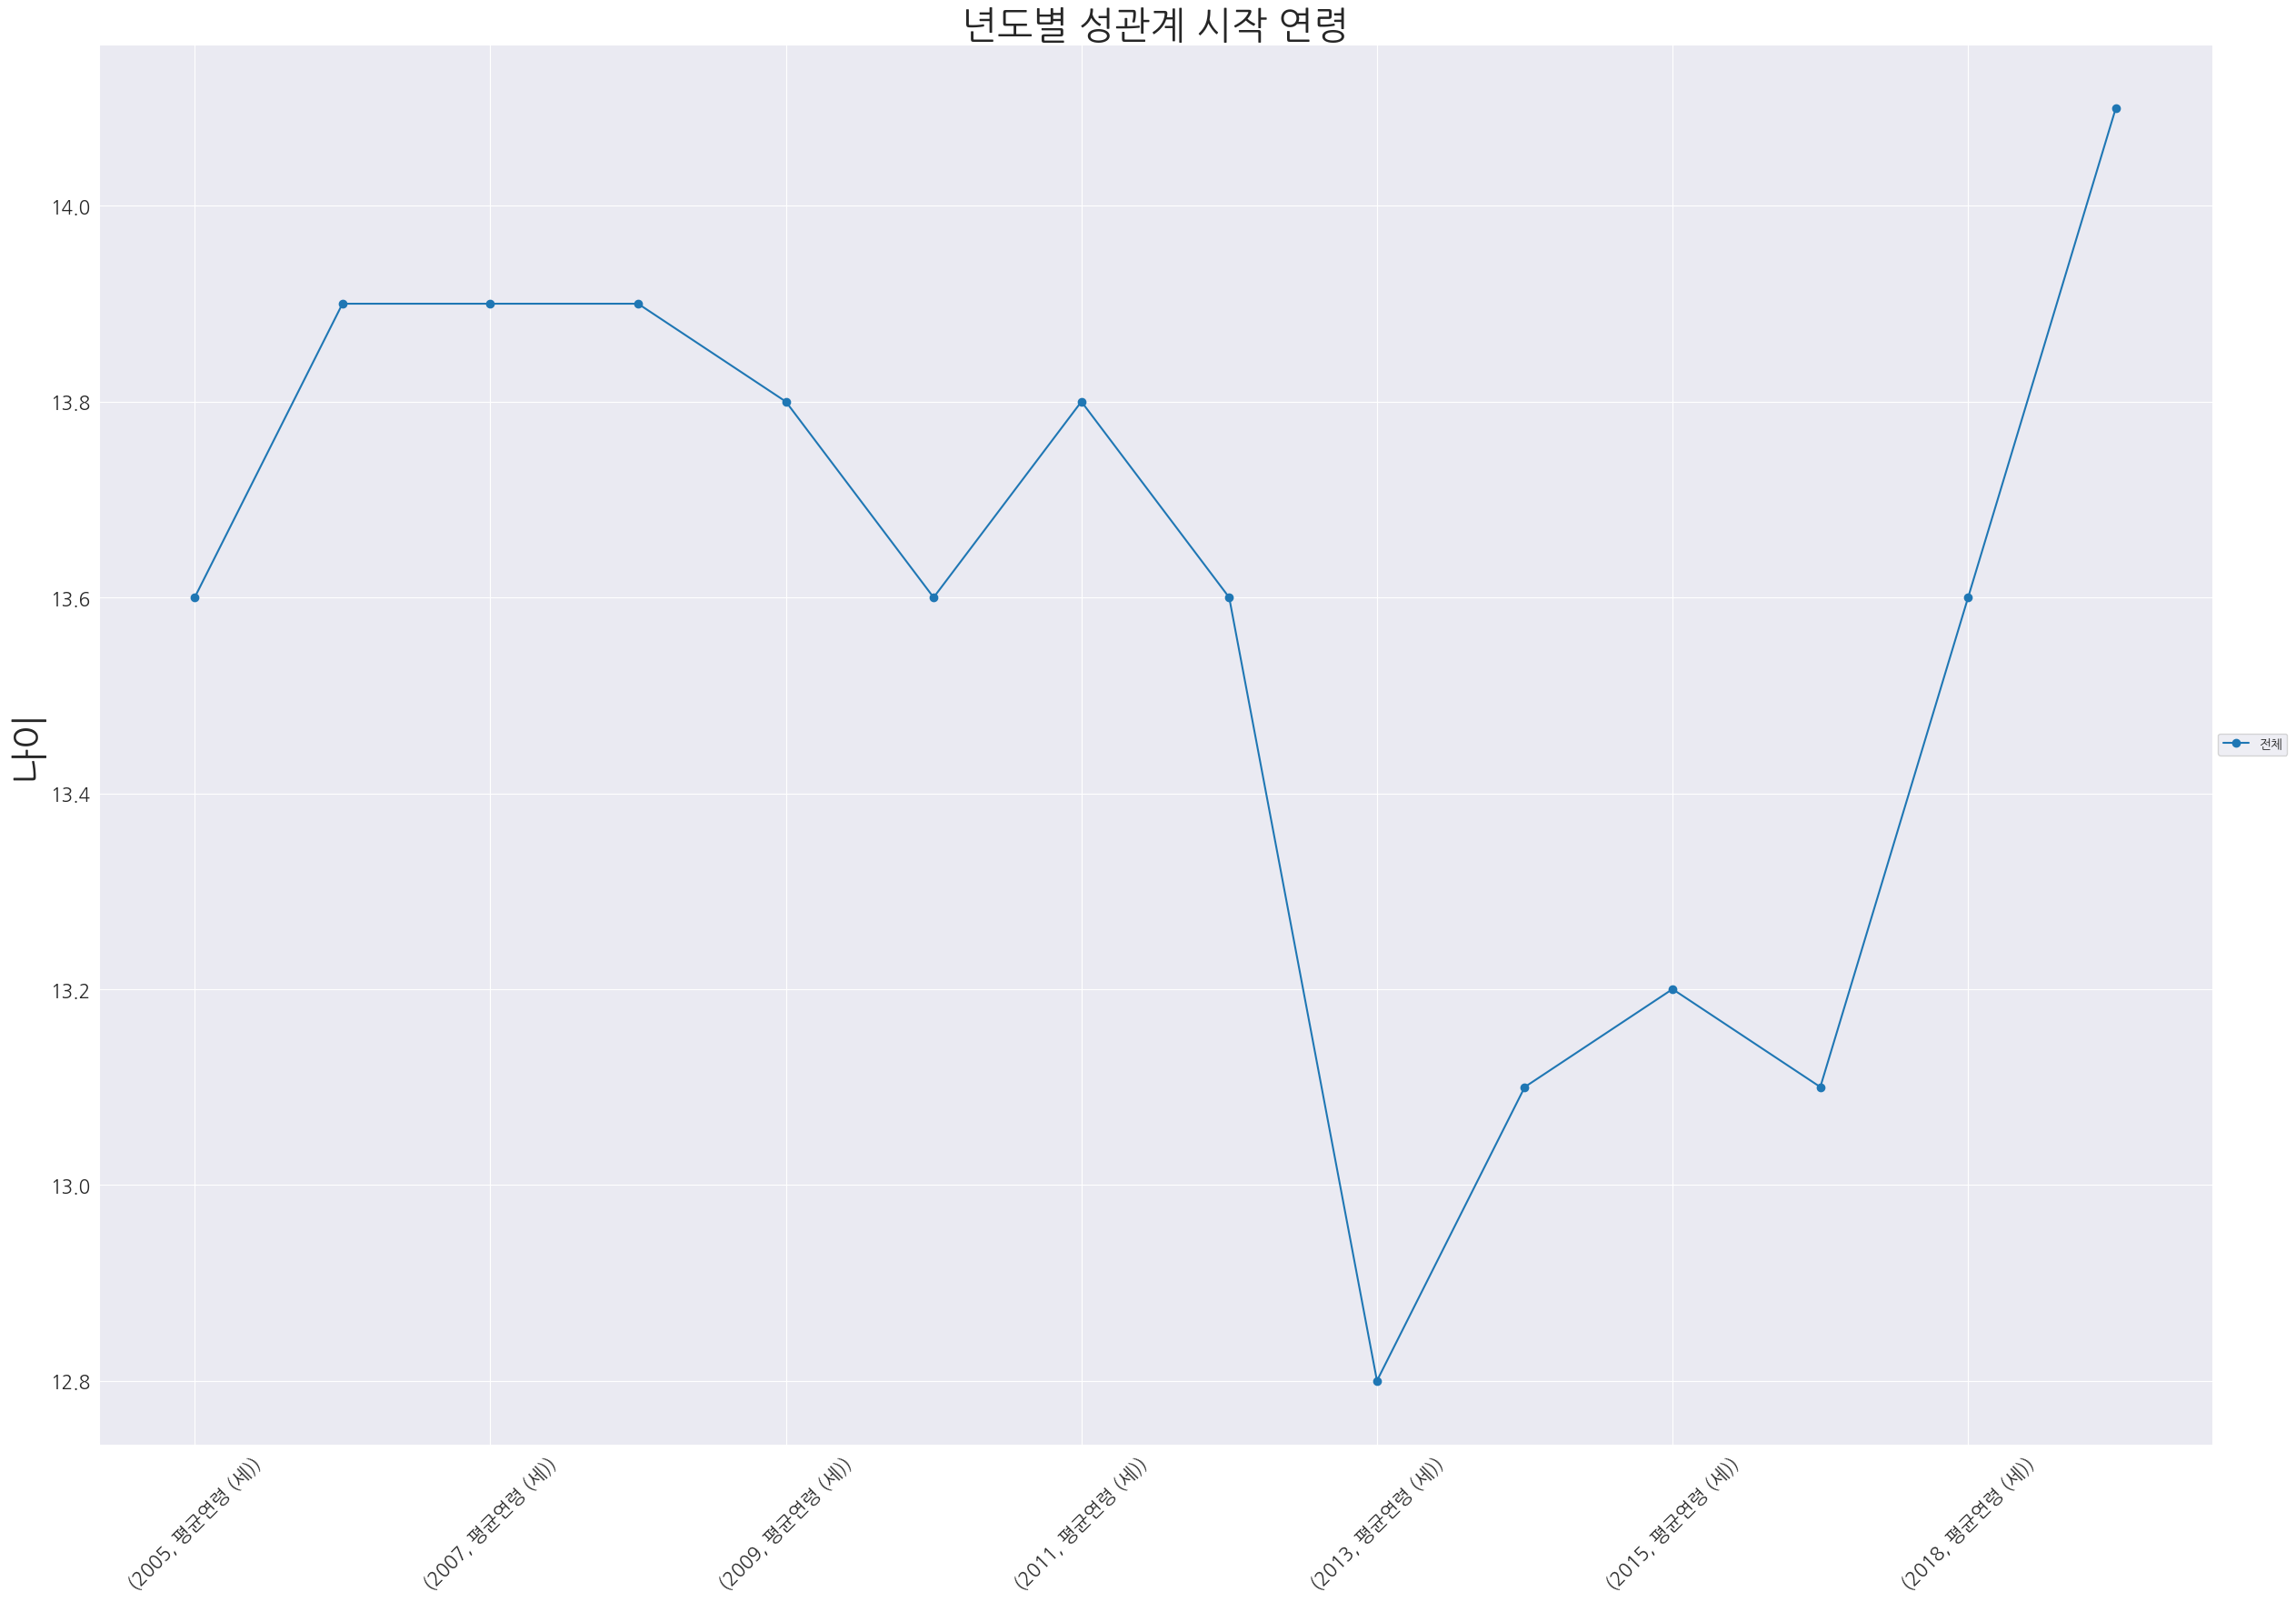

In [8]:
# 년도별 성관계 시작 연령 그래프화

sns.set_style('darkgrid')

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(30, 20))

df.loc['전체', (lis_sel,'평균연령 (세)')].plot(marker = 'o')

plt.title('년도별 성관계 시작 연령', fontsize = 30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(None)
plt.ylabel('나이', fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

# 성관계 시 임신 예방을 위한 피임 여부(2005 ~ 2021년)

In [9]:
# 성관계 시 임신 예방을 위한 피임 여부(2005~2021년)
df2 = pd.read_csv("C:/python/datas/피임실천율.csv", header = None)
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,구 분,2005,2005,2006,2006,2007.0,2007,2008,2008,2009,...,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
1,NaN,n,분율(표준오차),n,분율(표준오차),NaN,분율(표준오차),n,분율(표준오차),n,...,n,분율(표준오차),n,분율(표준오차),n,분율(표준오차),n,분율(표준오차),n,분율(표준오차)


In [10]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df2.to_csv("피임.csv", index = False)
df2 = pd.read_csv("피임.csv", index_col = 0)

df2.head(2)

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,,,,,,,,,,,,,,,,,,,,,
구 분,2005,2005,2006,2006,2007.0,2007,2008,2008,2009,2009,...,2017,2017,2018,2018,2019,2019,2020,2020,2021,2021
NaN,n,분율(표준오차),n,분율(표준오차),NaN,분율(표준오차),n,분율(표준오차),n,분율(표준오차),...,n,분율(표준오차),n,분율(표준오차),n,분율(표준오차),n,분율(표준오차),n,분율(표준오차)


In [11]:
# 중복 인덱스를 설정하기
new_header = [df2.iloc[0], df2.iloc[1]]
df2 = df2[2:]
df2.columns = new_header
df2.head(2)

구 분  2005           2006           2007.0     2007  2008           2009  \
nan     n 분율(표준오차)     n 분율(표준오차)     NaN 분율(표준오차)     n 분율(표준오차)     n   
0                                                                         
전체   2587     28.3  2632     38.9  3189.0     39.1  3175     41.1  3143   
남자   1672     31.1  1783     39.6  2251.0     40.3  2164     42.3  2204   

구 분           ...  2017           2018           2019           2020           \
nan 분율(표준오차)  ...     n 분율(표준오차)     n 분율(표준오차)     n 분율(표준오차)     n 분율(표준오차)   
0             ...                                                               
전체      41.7  ...  3033     49.9  3209     59.3  3282     58.7  2487     66.8   
남자      42.2  ...  2119     49.7  2118     57.9  2285     58.4  1616     67.1   

구 분  2021           
nan     n 분율(표준오차)  
0                   
전체   2833     65.5  
남자   1785     64.6  

[2 rows x 34 columns]

In [12]:
# str로 된 숫자를 float으로 변경

df2.iloc[:,1:] = df2.iloc[:,1:].astype('f')

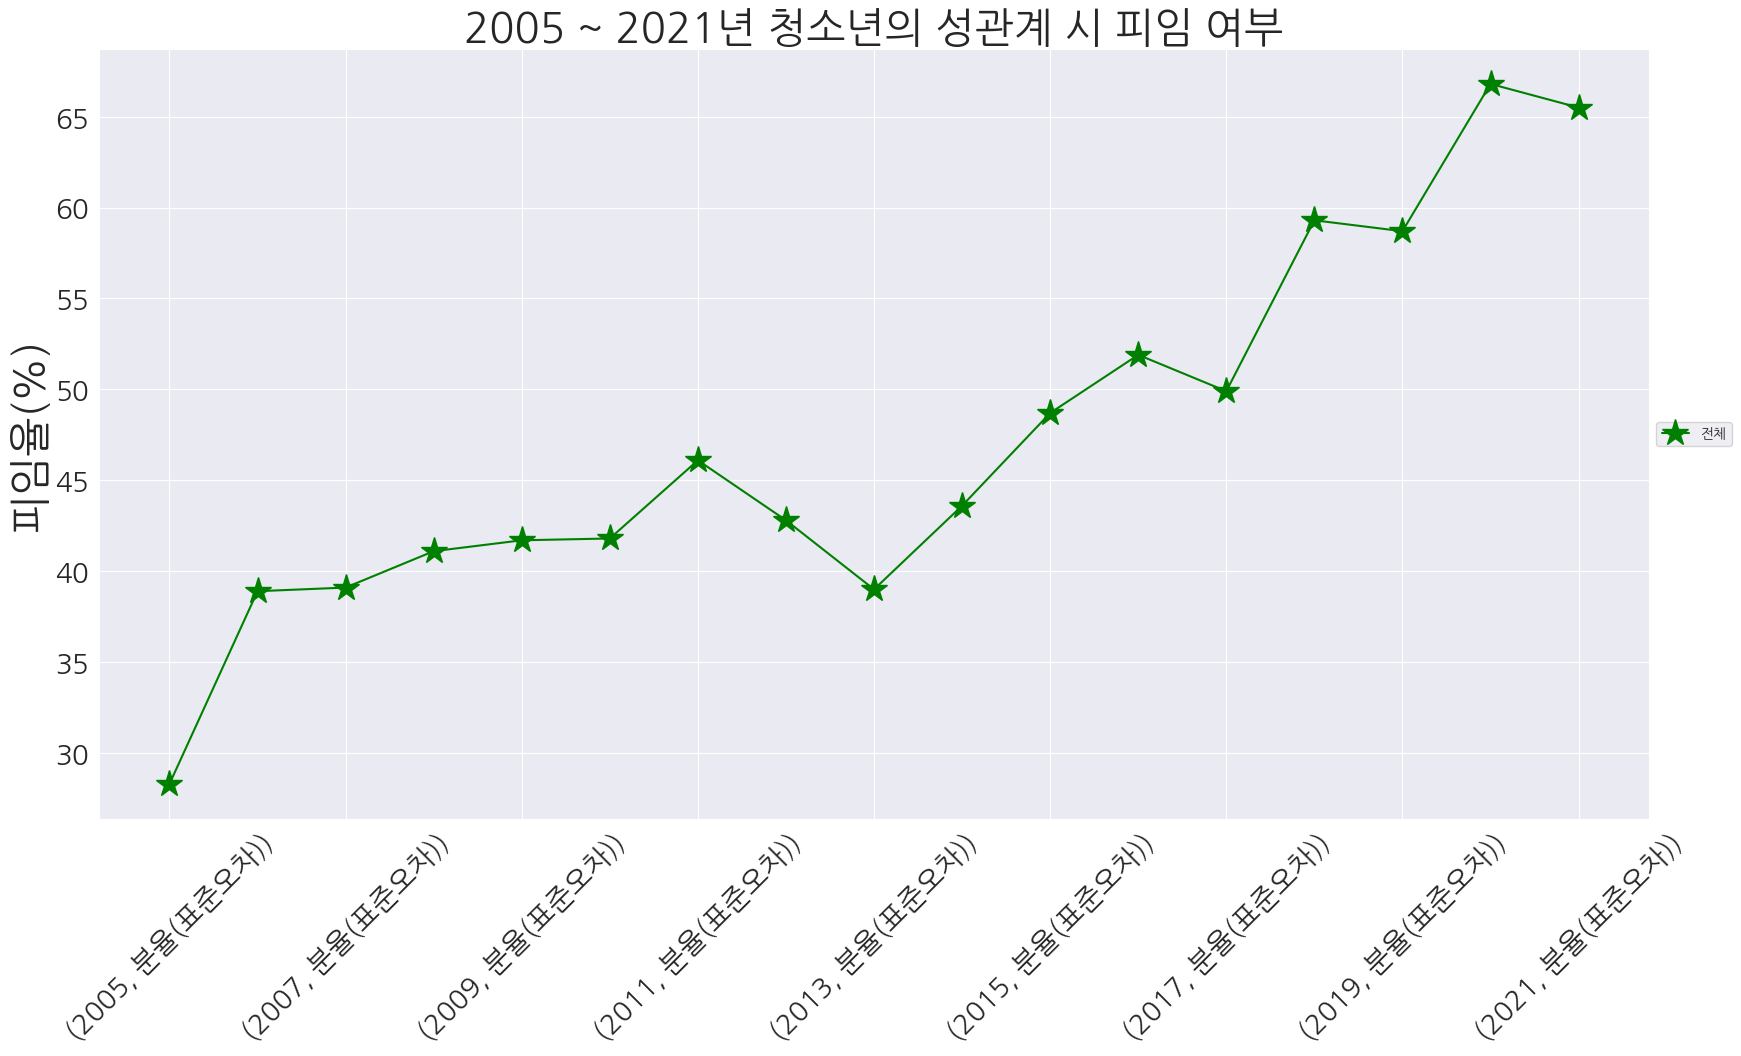

In [13]:
# 청소년 피임 여부 조사
plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(20, 10))

ax = df2.iloc[0,1::2].plot(marker = '*', color = 'g', ms = 20)

plt.title('2005 ~ 2021년 청소년의 성관계 시 피임 여부', fontsize = 30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('피임율(%)', fontsize = 30)
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel(None)
plt.show()

# 서울시 모(母) 합계출산율

In [14]:
# 서울시 모(母) 합계출산율 불러오기

df3 = pd.read_csv("C:/python/datas/합계출산율_및_모의_연령별_출산율.csv", header = None)
df3.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,자치구별(1),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),...,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)


In [15]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df3.to_csv("서울시 모의 합계출산율.csv", index = False)
df3 = pd.read_csv("서울시 모의 합계출산율.csv", index_col = 0)

df3.head(2)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(1),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),...,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)


In [16]:
# 중복 인덱스를 설정하기
new_header = [df3.iloc[0], df3.iloc[2]]
df3 = df3[3:]
df3.columns = new_header
df3.head(2)

자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(1),15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,...,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세
0,,,,,,,,,,,,,,,,,,,,,
서울특별시,1.7,1.5,1.4,1.3,1.3,2.2,1.8,1.7,1.5,1.5,...,1.2,1.2,1,1,0.9,0.7,0.6,0.5,0.3,0.2
종로구,NaN,NaN,NaN,0.9,0.5,2.5,2.3,1.4,0.8,0.8,...,0.2,NaN,0.5,0.5,NaN,0.5,0.3,0.6,NaN,0


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 서울특별시 to 강동구
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   (1997, 15-19세)  1 non-null      object
 1   (1998, 15-19세)  1 non-null      object
 2   (1999, 15-19세)  1 non-null      object
 3   (2000, 15-19세)  26 non-null     object
 4   (2001, 15-19세)  26 non-null     object
 5   (2002, 15-19세)  26 non-null     object
 6   (2003, 15-19세)  26 non-null     object
 7   (2004, 15-19세)  26 non-null     object
 8   (2005, 15-19세)  26 non-null     object
 9   (2006, 15-19세)  26 non-null     object
 10  (2007, 15-19세)  26 non-null     object
 11  (2008, 15-19세)  26 non-null     object
 12  (2009, 15-19세)  25 non-null     object
 13  (2010, 15-19세)  26 non-null     object
 14  (2011, 15-19세)  26 non-null     object
 15  (2012, 15-19세)  26 non-null     object
 16  (2013, 15-19세)  25 non-null     object
 17  (2014, 15-19세)  26 non-null     object
 18  (2015, 15-19

In [18]:
# str로 된 숫자를 float으로 변경
df3.iloc[:] = df3.iloc[:].astype('f')

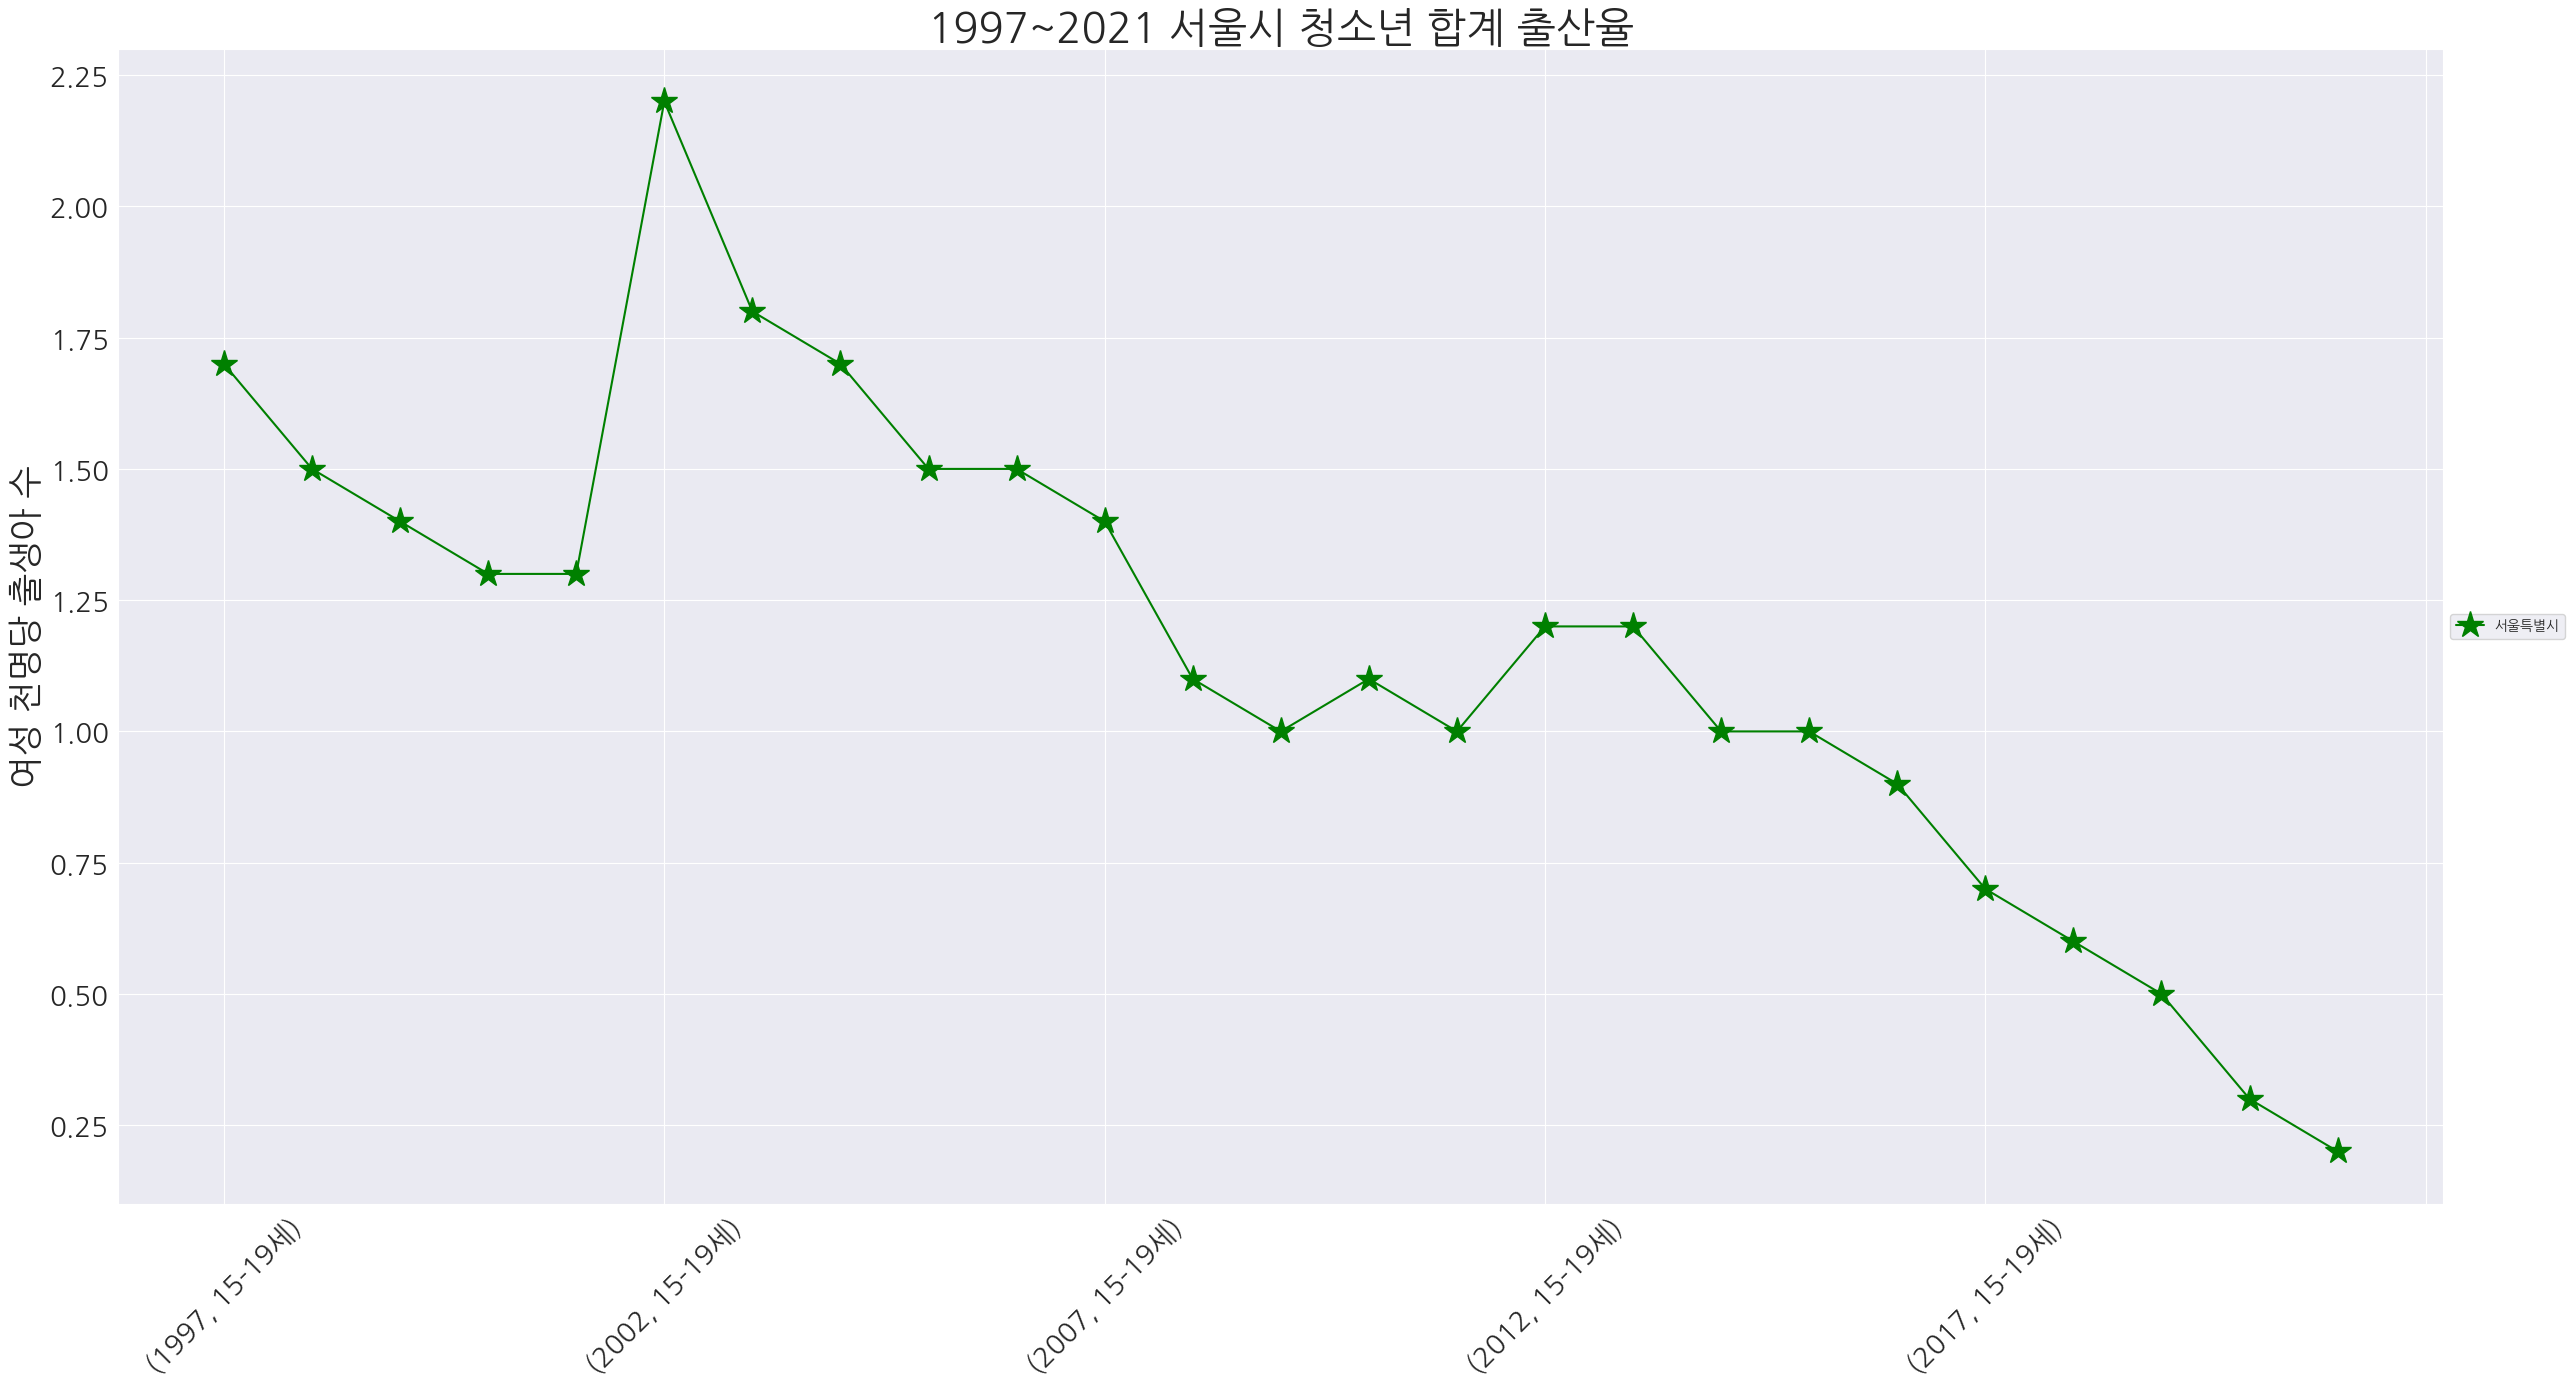

In [19]:
# 서울시 모의 합계출산율
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(30, 15))

df3.iloc[0, :].plot(marker = '*', color = 'g', ms = 20)

plt.title('1997~2021 서울시 청소년 합계 출산율', fontsize = 30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('여성 천명당 출생아 수', fontsize = 25)
plt.xlabel(None)
plt.xticks(rotation = 45, fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [20]:
df4 = pd.read_csv("서울시 모의 합계출산율.csv", index_col = 0)
df4.head(2)

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(1),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),...,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)


In [21]:
# 자치구별 연도별 출생률 필터링
new_header = [df4.iloc[0]]
df4 = df4[3:]
df4.columns = new_header
df4.head(2)

자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,,,,,,,,,,,,,,,,,,,,,
서울특별시,1.7,1.5,1.4,1.3,1.3,2.2,1.8,1.7,1.5,1.5,...,1.2,1.2,1,1,0.9,0.7,0.6,0.5,0.3,0.2
종로구,NaN,NaN,NaN,0.9,0.5,2.5,2.3,1.4,0.8,0.8,...,0.2,NaN,0.5,0.5,NaN,0.5,0.3,0.6,NaN,0


In [22]:
# str로 된 숫자를 float으로 변경
df4.iloc[:] = df4.iloc[:].astype('f')

In [23]:
# 연도 데이터를 row index로 변경
df4 = df4.T
df4.head(2)

0,서울특별시,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구별(1),,,,,,,,,,,,,,,,,,,,,
1997,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# 서울특별시 컬럼 삭제 & NaN값 0으로 채우기
df4 = df4.fillna(0)
del df4['서울특별시']
df4.head(2)

0,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구별(1),,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# 1997 ~ 1999 자치구별 출산율 데이터가 없으므로 제거

df4 = df4.iloc[3:,:]
df4.head(2)

0,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구별(1),,,,,,,,,,,,,,,,,,,,,
2000,0.9,1.3,1.3,2.1,1.2,1.7,2.2,1.9,2.2,0.9,...,1.3,1.9,2.3,1.9,0.9,1.2,0.4,0.3,0.8,1.5
2001,0.5,1.8,1.8,2.0,0.9,2.0,2.1,1.5,1.9,1.4,...,0.9,2.3,2.5,1.6,1.5,1.1,0.3,0.8,0.5,1.1


In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22 entries, ('2000',) to ('2021',)
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종로구     22 non-null     float64
 1   중구      22 non-null     float64
 2   용산구     22 non-null     float64
 3   성동구     22 non-null     float64
 4   광진구     22 non-null     float64
 5   동대문구    22 non-null     float64
 6   중랑구     22 non-null     float64
 7   성북구     22 non-null     float64
 8   강북구     22 non-null     float64
 9   도봉구     22 non-null     float64
 10  노원구     22 non-null     float64
 11  은평구     22 non-null     float64
 12  서대문구    22 non-null     float64
 13  마포구     22 non-null     float64
 14  양천구     22 non-null     float64
 15  강서구     22 non-null     float64
 16  구로구     22 non-null     float64
 17  금천구     22 non-null     float64
 18  영등포구    22 non-null     float64
 19  동작구     22 non-null     float64
 20  관악구     22 non-null     float64
 21  서초구     22 non-null     fl

In [27]:
# # 각 년도별 상위 5개 자치구 필터링
# top_5_borough= set()
# for index, row in df4.iterrows():
#     top_5_borough |= set(row[row>0].sort_values(ascending=False).head(5).index)

# df4 = df4[top_5_borough]
# df4.head(2)

In [28]:
# 자치구별 연도 데이터 동적 바 차트로 표현

# bcr.bar_chart_race(df = df4, 
#                    n_bars = 5,
#                    # figsize=(6, 4),
#                    sort='desc',
#                    orientation = 'h',
#                    title='서울시 상위 5개 자치구 청소년 출산율 추이(단위 : 천명당 출생아 수)',
#                    filename = '서울시 상위 5개 자치구 청소년 출산율 추이.gif',
#                    bar_size = 0.7, # bar의 두께
#                    period_length=3000, # 한 주기가 표기되는 시간ㅌ
#                    steps_per_period=60 , # 초당 프레임 수(fps)
#                    bar_label_size = 20 , # 좌측 라벨 크기(yticks)
#                    tick_label_size = 20) # bar 우측 숫자 크기(bar label)

bcr.bar_chart_race(df = df4, 
                   n_bars = 25,
                   sort='desc',
                   orientation = 'h',
                   title='서울시 자치구별 청소년 출산율 추이(단위 : 천명당 출생아 수)',
                   filename = '서울시 자치구별 청소년 출산율 추이.gif',
                   bar_size = 0.7, # bar의 두께
                   period_length=3000, # 한 주기가 표기되는 시간ㅌ
                   steps_per_period=60 , # 초당 프레임 수(fps)
                   bar_label_size = 10 , # bar 우측 숫자 크기(bar label)
                   tick_label_size = 10) # 좌측 라벨 크기(yticks)


C:\Users\user\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\user\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
MovieWriter imagemagick unavailable; using Pillow instead.


# 청소년 인구

In [29]:
# 청소년 인구 불러오기

df5 = pd.read_csv("C:/python/datas/청소년인구.csv", header = None)
df5.head(2)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,자치구별(1),자치구별(2),2000,2000,2001,2001,2002,2002,2003,2003,...,2018,2018,2019,2019,2020,2020,2021,2021,2022,2022
1,자치구별(1),자치구별(2),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),...,0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명)


In [30]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df5.to_csv("서울시 청소년인구.csv", index = False)
df5 = pd.read_csv("서울시 청소년인구.csv", index_col = 0)
df5 = df5.set_index(df5.iloc[:,0])
df5.head(2)

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
1,,,,,,,,,,,,,,,,,,,,,
자치구별(2),자치구별(2),2000,2000,2001,2001,2002,2002,2003,2003,2004,...,2018,2018,2019,2019,2020,2020,2021,2021,2022,2022
자치구별(2),자치구별(2),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),...,0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명)


In [31]:
# 중복 인덱스를 설정하기
new_header = [df5.iloc[0], df5.iloc[2]]
df5 = df5[3:]
df5.columns = new_header
df5.head(2)

자치구별(2) 자치구별(2)     2000             2001             2002             2003  \
자치구별(2) 자치구별(2)       소계 구성비 (%)       소계 구성비 (%)       소계 구성비 (%)       소계   
1                                                                             
소계           소계  2527901    24.5  2434051    23.7  2354800    23.1  2300473   
종로구         종로구    41299    22.2    39753    21.6    38300    21.1    37115   

자치구별(2)             2004  ...     2018             2019             2020  \
자치구별(2) 구성비 (%)       소계  ...       소계 구성비 (%)       소계 구성비 (%)       소계   
1                         ...                                              
소계         22.6  2258385  ...  1437449    14.7  1370602    14.1  1310205   
종로구        20.9    35504  ...    19179    12.5    18167      12    17058   

자치구별(2)             2021             2022          
자치구별(2) 구성비 (%)       소계 구성비 (%)       소계 구성비 (%)  
1                                                  
소계         13.6  1255170    13.2  1208208    12.8  
종로구        11.4    16062    11.1    15246    10.8  

[2 rows x 47 columns]

In [32]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 소계 to 강동구
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (자치구별(2), 자치구별(2))  26 non-null     object
 1   (2000, 소계)          26 non-null     object
 2   (2000, 구성비 (%))     26 non-null     object
 3   (2001, 소계)          26 non-null     object
 4   (2001, 구성비 (%))     26 non-null     object
 5   (2002, 소계)          26 non-null     object
 6   (2002, 구성비 (%))     26 non-null     object
 7   (2003, 소계)          26 non-null     object
 8   (2003, 구성비 (%))     26 non-null     object
 9   (2004, 소계)          26 non-null     object
 10  (2004, 구성비 (%))     26 non-null     object
 11  (2005, 소계)          26 non-null     object
 12  (2005, 구성비 (%))     26 non-null     object
 13  (2006, 소계)          26 non-null     object
 14  (2006, 구성비 (%))     26 non-null     object
 15  (2007, 소계)          26 non-null     object
 16  (2007, 구성비 (%))     26 non-null

In [33]:
# str로 된 숫자를 float으로 변경

df5.iloc[:,1:] = df5.iloc[:,1:].astype('f')

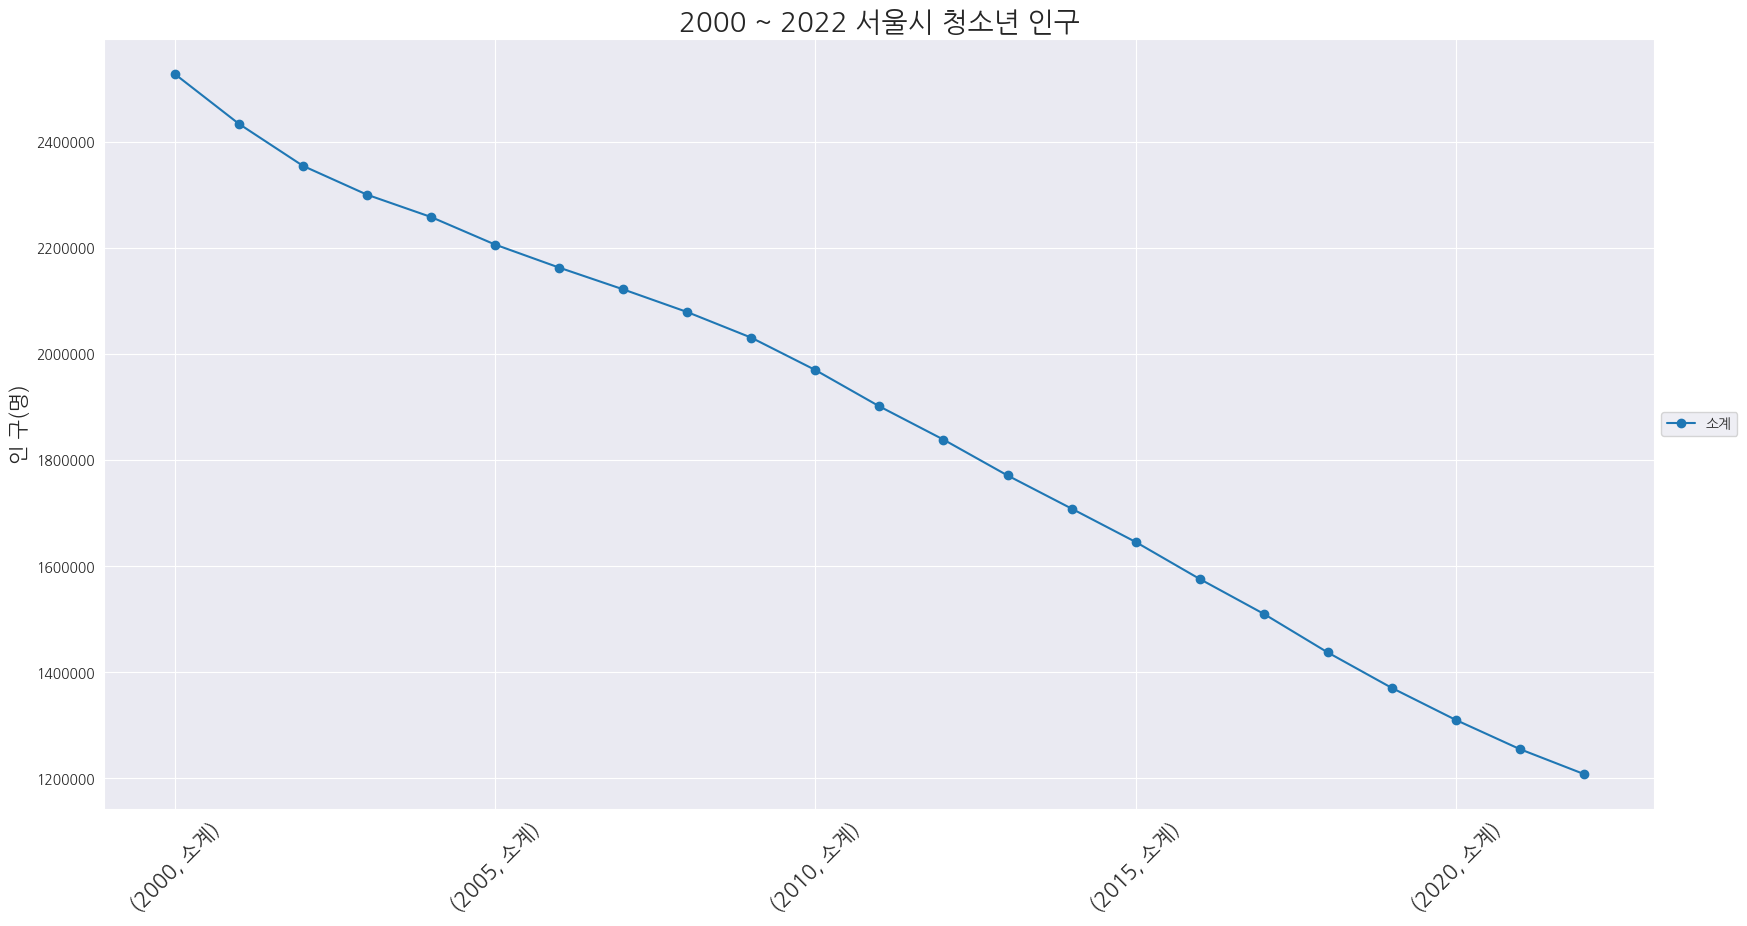

In [34]:
# 서울시 청소년 인구
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(20, 10))

df5.iloc[0,1::2].plot(marker = 'o')
    
plt.title('2000 ~ 2022 서울시 청소년 인구', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(None)
plt.xticks(rotation = 45, fontsize = 15)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.ylabel('인 구(명)', fontsize = 15)
plt.show()